<a href="https://colab.research.google.com/github/MasterExecuson/Data-Science-Analytics/blob/main/Statistics%20in%20R/Challenge%201/Desafio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vinícius Marques Matos - atividade 1

Instruções:

Instale e carregue a biblioteca 'datasets'. Esta biblioteca oferece uma grande quantidade de conjuntos de dados disponíveis para utilização.
A biblioteca pode ser carregada utilizando o seguinte comando:

library(datasets)

Uma vez carregada a biblioteca, carregue o dataset mtcars (https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars). O dataset pode ser carregado com o seguinte comando:

data(mtcars)

Uma vez carregado o dataset, desenvolva as seguintes análises descritivas com os conteúdos vistos até o momento.

1- Identifique o tipo de cada variável presente no dataset.
2- Escolha uma variável qualitativa, construa a tabela de frequências e interprete os valores.
3- Construa um gráfico de barras para uma variável qualitativa utilizando a biblioteca ggplot2.
4- Escolha uma variável quantitativa e construa um gráfico de barras utilizando a biblioteca ggplot2 (lembre-se que a variável deve ser agrupada previamente).


Como entrega da atividade, devem ser anexados o script em R e os resultados em word.

In [92]:
#install.packages('psych')
#install.packages('reshape2')


In [93]:

library('readxl')
library('data.table')
library('datasets')
library(psych)
library('ggplot2')
library('scales')
library('reshape2')

In [94]:
df <-as.data.table(mtcars)

In [95]:
head(df)


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [96]:
str(df)

Classes ‘data.table’ and 'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...
 - attr(*, ".internal.selfref")=<externalptr> 


A tabelta mtcars possui 11 colunas, todas com números, e um indice string, que se da pelo nome e modelo de um carro. As colunas vs e am são booleanos, sendo assim valores qualitativos nominais:

* [, 8]	vs	Engine (0 = V-shaped, 1 = straight)
* [, 9]	am	Transmission (0 = automatic, 1 = manual)

As colunas Gear, Cyl e carb são variáveis quantitativas discretas. Já as variáveis mpg, drat,HP, Disp, wt e qsec são variáveis quantitativas contínuas. 

Podemos agrupar algumas das variáveis quantitativas discretas e em grupos, a fim de melhor analisar o banco de dados.



In [97]:
df$cyl <- factor(df$cyl)
df$gear <- factor(df$gear)
df$carb <- factor(df$carb)
df$vs <- factor(df$vs)
df$am <- factor(df$am)
df[ , gear := as.numeric(gear)]

In [98]:
summary(df)

      mpg        cyl         disp             hp             drat      
 Min.   :10.40   4:11   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   6: 7   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   8:14   Median :196.3   Median :123.0   Median :3.695  
 Mean   :20.09          Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80          3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90          Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec       vs     am          gear       carb  
 Min.   :1.513   Min.   :14.50   0:18   0:19   Min.   :1.000   1: 7  
 1st Qu.:2.581   1st Qu.:16.89   1:14   1:13   1st Qu.:1.000   2:10  
 Median :3.325   Median :17.71                 Median :2.000   3: 3  
 Mean   :3.217   Mean   :17.85                 Mean   :1.688   4:10  
 3rd Qu.:3.610   3rd Qu.:18.90                 3rd Qu.:2.000   6: 1  
 Max.   :5.424   Max.   :22.90                 Max.   :3.000   8: 1  

In [99]:
(tabela <- table(df$vs,df$gear))
(Total_linha<-margin.table(tabela,2))  # O argumento 2 define a marginal da coluna
(Total_coluna<-margin.table(tabela,1)) # O argumento 1 define a marginal da linha
tabFinal<-rbind(cbind(tabela,Total_coluna),c(Total_linha, sum(Total_coluna)))
dimnames(tabFinal)[[1]][3]<-"Total_linha" 
tabFinal

   
     1  2  3
  0 12  2  4
  1  3 10  1


 1  2  3 
15 12  5 


 0  1 
18 14 

,1,2,3,Total_coluna
0,12,2,4,18
1,3,10,1,14
Total_linha,15,12,5,32


Analisando a variável vs, podemos ver que a maior parte dos motores vs possuem 4 marchas para frente e a maioria dos motores normais possuem 3 marchas para frente.

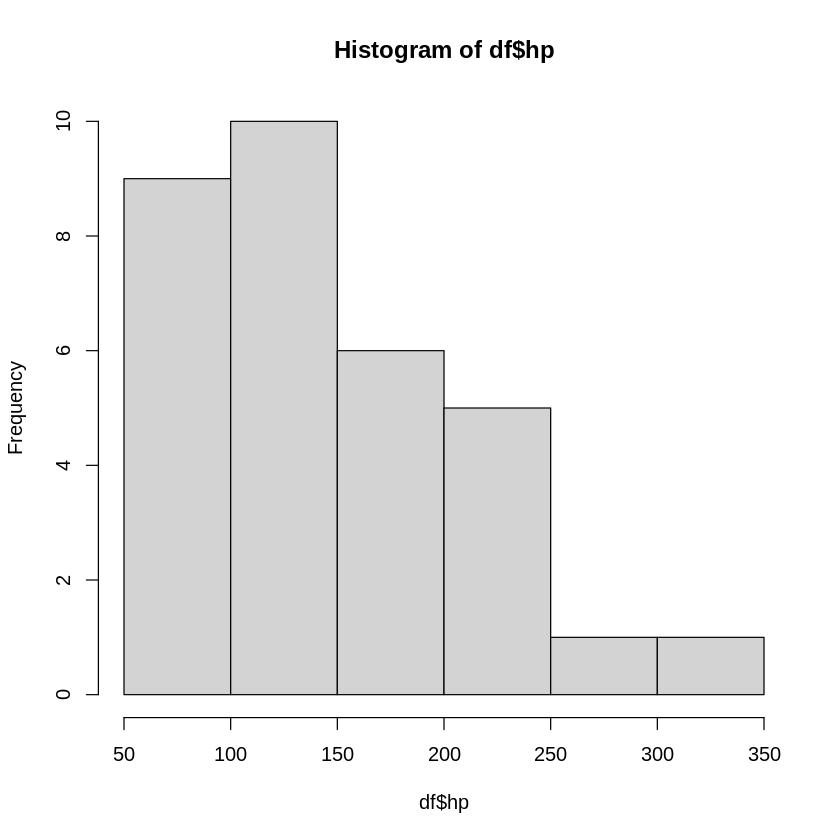

In [102]:
hist(df$hp)

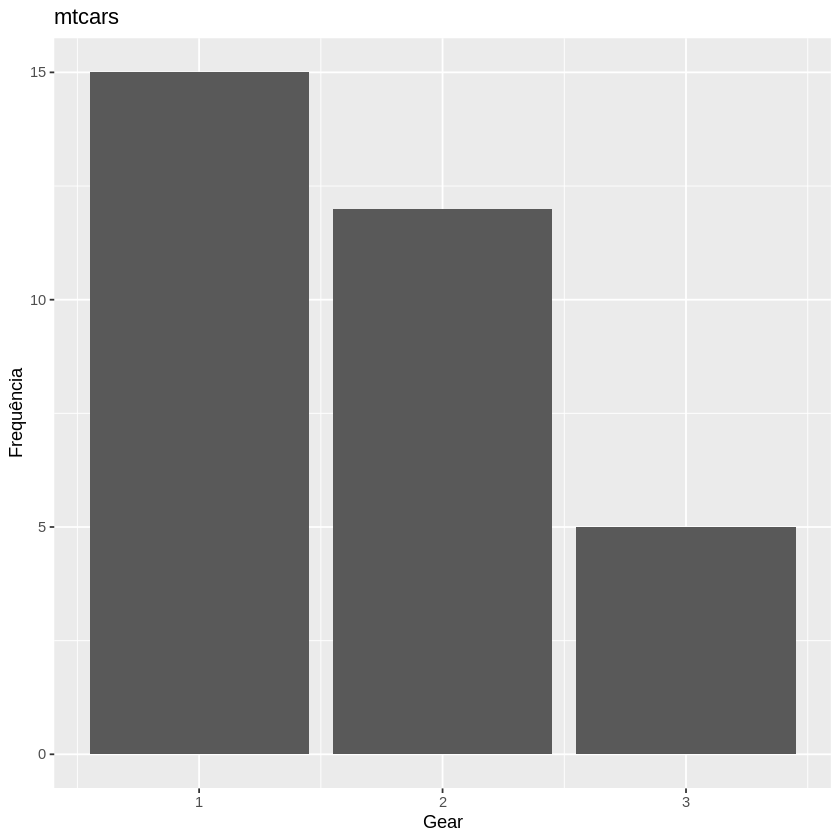

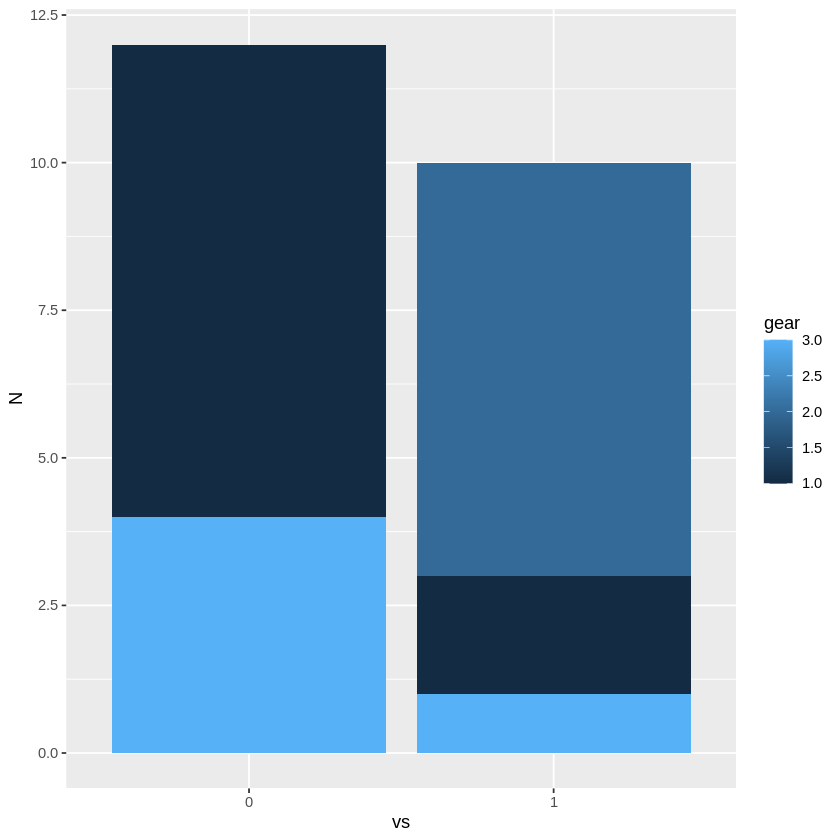

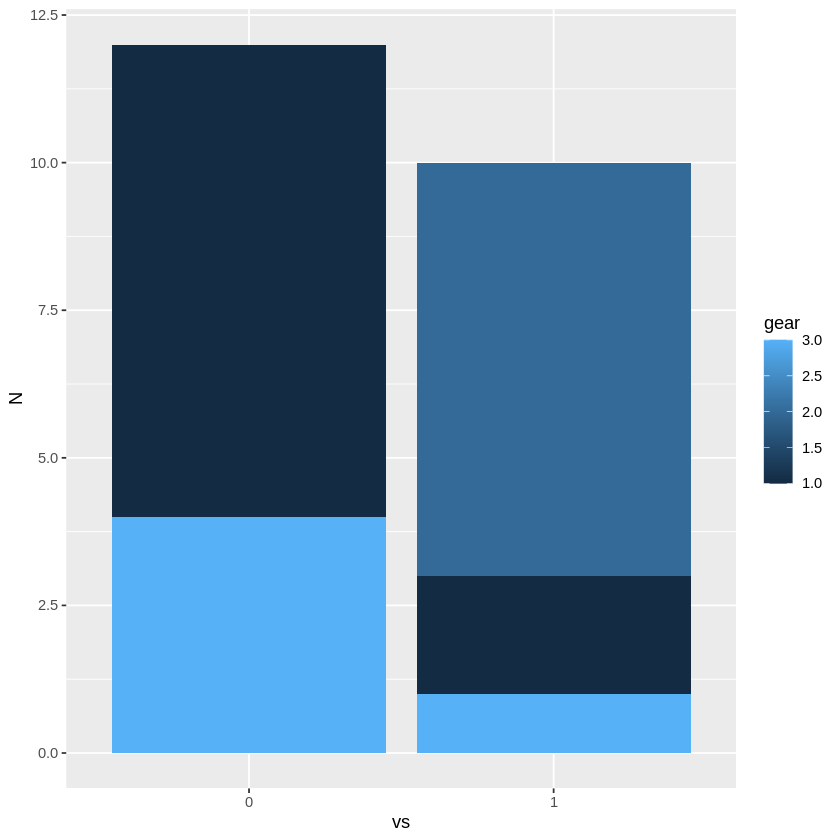

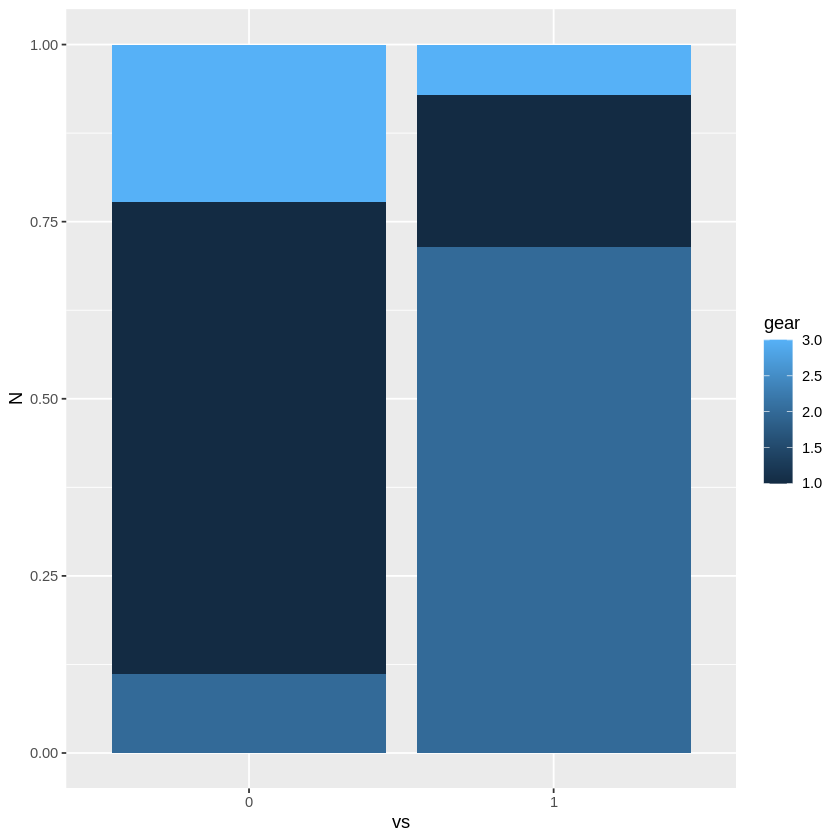

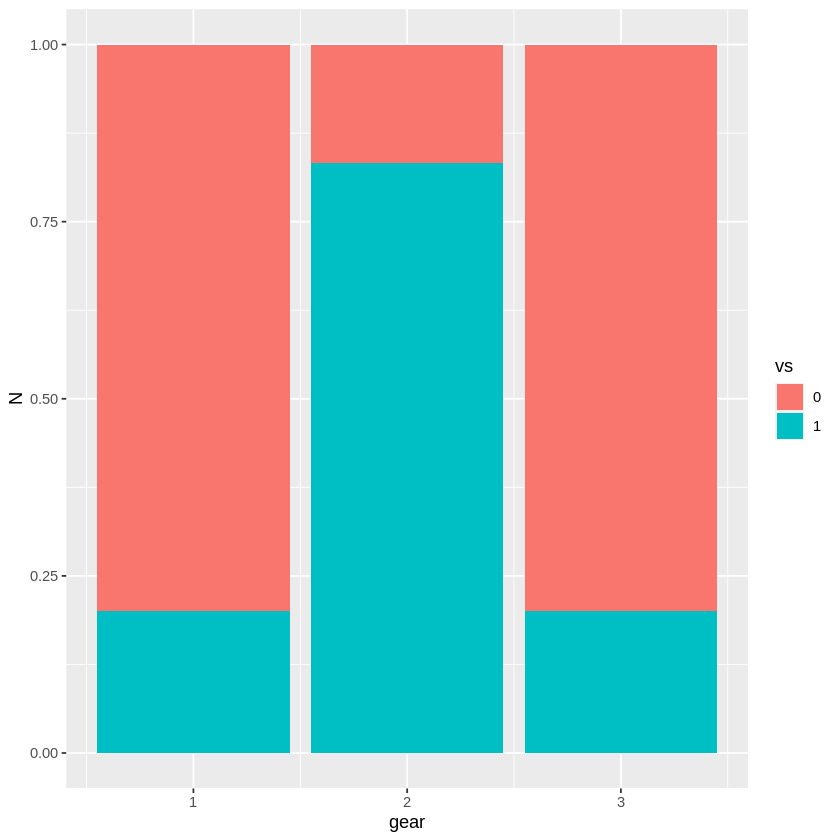

In [105]:

df1 <- df[!is.na(df$vs),.N, by = list(vs,gear)]

ggplot(df, aes(x=gear)) + 
  geom_bar() + 
  labs(x="Gear", y="Frequência", title="mtcars")

ggplot(df1 , aes(x = vs, y = N, fill = gear))+
  geom_bar(stat="identity",position = "dodge")

  ggplot(df1 , aes(x = vs, y = N, fill = gear))+
  geom_bar(stat="identity",position = "dodge")

ggplot(df1 , aes(x = vs, y = N, fill = gear))+
  geom_bar(stat="identity",position = "fill")

ggplot(df1 , aes(x = gear, y = N, fill = vs))+
  geom_bar(stat="identity",position = "fill")